<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [34]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


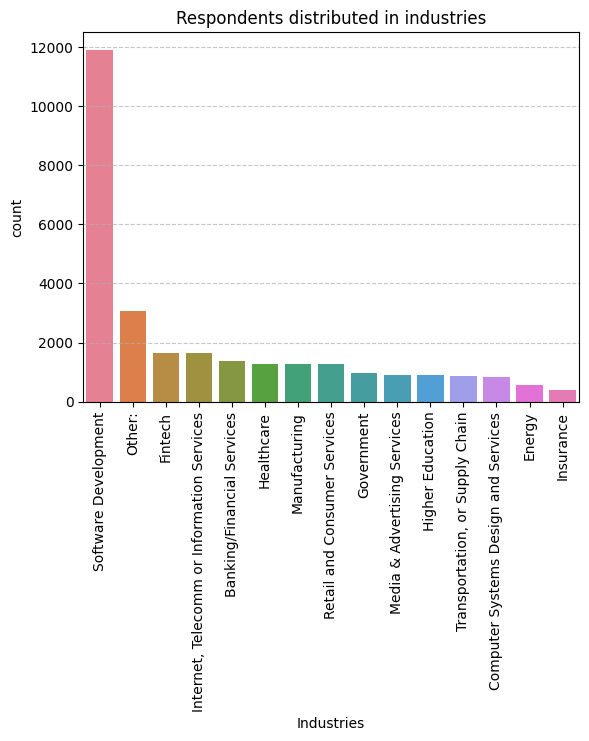

In [36]:
##Write your code here
subset_df5 = df[['Industry']].copy()
subset_df5 = subset_df5.dropna(subset=['Industry'])
industry_counts = subset_df5['Industry'].value_counts()
sns.barplot(x=industry_counts.index, y=industry_counts.values, hue=industry_counts.index, legend=False)
plt.xlabel('Industries')
plt.ylabel('count')
plt.title('Respondents distributed in industries')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [37]:
##Write your code here

print("Basic Statistics for the 'ConvertedCompYearly Column':")
print(df['ConvertedCompYearly'].describe())

# Calculate mean and standard deviation
mean = df['ConvertedCompYearly'].mean()
std_dev = df['ConvertedCompYearly'].std()

# Filter values exceeding 3 times the standard deviation above the mean
filtered_values = df[df['ConvertedCompYearly'] > mean + 3 * std_dev]['ConvertedCompYearly']

# Display the filtered values
print('\nCompensation values exceeding 3 standard deviations above the mean:')
filtered_values

Basic Statistics for the 'ConvertedCompYearly Column':
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

Compensation values exceeding 3 standard deviations above the mean:


529       650000.0
828      1000000.0
1932      945000.0
2171      750000.0
2187     2000000.0
           ...    
38219    1000000.0
39643    1300000.0
40066     800000.0
40952     750000.0
41027     700000.0
Name: ConvertedCompYearly, Length: 89, dtype: float64

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower Bound: -80177.25
Upper Bound: 220860.75


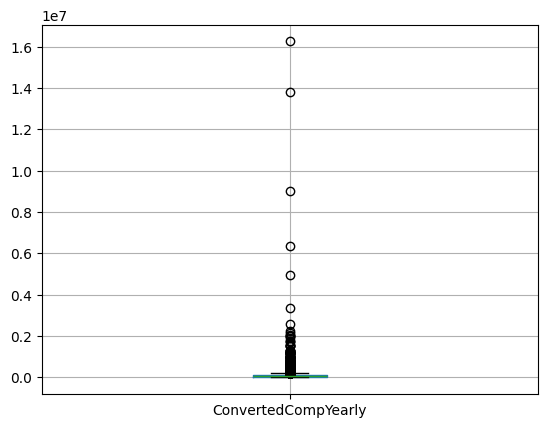

In [38]:
##Write your code here

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)

# Determine bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Boxplot for column 'ConvertedCompYearly'
df.boxplot(column='ConvertedCompYearly')

# Show the plot
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [39]:
##Write your code here

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

df_no_outliers.shape

(22457, 114)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [43]:
##Write your code here

# Custom function to map values
def map_age(value):
    if value == 'Under 18 years old':
        return 18
    elif value == '18-24 years old':
        return 21
    elif value == '25-34 years old':
        return 29.5
    elif value == '35-44 years old':
        return 39.5
    elif value == '45-54 years old':
        return 49.5
    elif value == '55-64 years old':
        return 59.5
    elif value == '65 years or older':
        return 65
    else:
        return 0  # Default for random/unknown entries

# Apply the custom function
df['Age'] = df['Age'].apply(map_age)

df['Age'].astype(float)

numeric_columns = df.select_dtypes(include=['number'])

numeric_columns.corr()


,ResponseId,Age,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
ResponseId,1.000000,-0.039079,-0.000000,0.011955,-0.002406,-0.015738,-0.014197,-0.001908,0.001843,-0.002968,0.001991,-0.005365,-0.005865,-0.008363,0.002425
Age,-0.039079,1.000000,-0.002763,0.832787,-0.026581,-0.073845,-0.099343,-0.047451,-0.080361,-0.044170,-0.079948,-0.111506,-0.104828,0.121346,0.069004
CompTotal,-0.000000,-0.002763,0.000000,0.028766,-0.004891,-0.002719,-0.003033,-0.006311,-0.005893,-0.004585,-0.004494,-0.003198,-0.003045,0.080457,-0.015770
WorkExp,0.011955,0.832787,0.028766,1.000000,-0.026490,-0.067241,-0.104525,-0.065352,-0.101461,-0.046958,-0.088090,-0.113707,-0.108279,0.154114,0.097322
JobSatPoints_1,-0.002406,-0.026581,-0.004891,-0.026490,1.000000,0.445710,0.633765,0.618618,0.603157,0.627385,0.597527,0.585087,0.607792,0.020306,0.094068
JobSatPoints_4,-0.015738,-0.073845,-0.002719,-0.067241,0.445710,1.000000,0.526254,0.449400,0.459253,0.438763,0.472516,0.499387,0.528395,0.018197,0.029677
JobSatPoints_5,-0.014197,-0.099343,-0.003033,-0.104525,0.633765,0.526254,1.000000,0.613933,0.607949,0.630353,0.619644,0.643538,0.690993,-0.023281,0.049224
JobSatPoints_6,-0.001908,-0.047451,-0.006311,-0.065352,0.618618,0.449400,0.613933,1.000000,0.692166,0.645094,0.632211,0.592528,0.604585,-0.008518,0.051341
JobSatPoints_7,0.001843,-0.080361,-0.005893,-0.101461,0.603157,0.459253,0.607949,0.692166,1.000000,0.698240,0.659558,0.642905,0.618444,-0.036431,0.038339
JobSatPoints_8,-0.002968,-0.044170,-0.004585,-0.046958,0.627385,0.438763,0.630353,0.645094,0.698240,1.000000,0.655668,0.617320,0.625185,-0.011080,0.058258


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
